# From The Interstellar Medium and Star Formation section on An Introduction to Modern Astrophysics by Carroll-Ostlie

Local acceleration of gravity is denoted by
$$\frac{d^2r}{dt^2} = -G\frac{M_r}{r^2}     ...(19)$$
Multiply both sides by the velocity of the surface of the sphere:
$$\frac{dr}{dt}\frac{d^2r}{dt^2} = -(\frac{4\pi}{3}G\rho_0r_0^3)\frac{1}{r^2}\frac{dr}{dt}$$
then integrated with respect to time:
$$\frac{1}{2}(\frac{dr}{dt})^2 = (\frac{4\pi}{3}G\rho_0r_0^3)\frac{1}{r}+C_1$$
$C_1$ can be valuated by requiring that the velocity of the sphere's surface be zero at the beginning of the collapse, or $dr/dt=0$ when $r=r_0$. This gives
$$C_1=-\frac{4\pi}{3}G\rho_0r_0^2$$
Substituting and solving for the velocity at the surface, we have
$$\frac{dr}{dt}=-[\frac{8\pi}{3}G\rho_0r_0^2(\frac{r_0}{r}-1)]^{1/2}    ...(20)$$
We make substitutions
$$\theta=\frac{r}{r_0}$$
and
$$\chi=(\frac{8\pi}{3}G\rho_0)^{1/2}$$
which leads to
$$\frac{d\theta}{dt}=-\chi(\frac{1}{\theta}-1)^{1/2}    ...(21)$$
Another substitution,
$$\theta=cos^2\xi   ...(22)$$
after some manipulation
$$cos^2\xi\frac{d\xi}{dt}=\frac{\chi}{2}    ...(23)$$
Integrating with respect to time
$$\frac{\xi}{2}+\frac{1}{4}sin2\xi=\frac{\chi}{2}t+C_2  ...(24)$$
$r=r_0$ when $t=0$, which implies that $\theta=1$, or $\xi=0$ at the beginning of the collapse. Therefore, $C_2=0$
Equation of motion for the gravitational collapse of the cloud:
$$\xi+\frac{1}{2}sin2\xi=\chi t  ...(25)$$
Let $t=t_{ff}$ when the radius of the collapsing sphere reaches zero $(\theta=0, \xi=\pi/2)$. Then
$$t_{ff}=\frac{\pi}{2\chi}$$
Substituting the value for $\chi$,
$$t_{ff}=(\frac{3\pi}{32}\frac{1}{G\rho_0})^{1/2}   ...(26)$$

In [51]:
# Import the modules
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c

# Define the variables
density = [5e-13, 1e-13, 5e-14] # kg/m3
theta = np.linspace(0, 1, 1000)
time = []

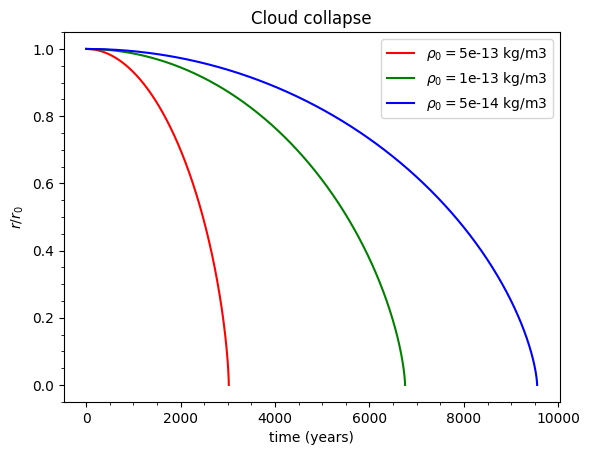

In [52]:
# Iteration to find time
for i in range(len(density)):
    # From Eq. 22 and Eq. 25
    t = (np.arccos((theta)**0.5) + 0.5*np.sin(2*(np.arccos((theta)**0.5)))) / ((8/3*np.pi*c.G*density[i])**0.5)
    # Convert the time (seconds) into time (years)
    t = t/(3600*24*360)
    time.append(t)

# Plot the theta vs time (years)
for i in range(len(density)):
    color = ['red', 'green', 'blue']

    plt.plot(time[i], theta, label=r'$\rho_0=$'+ str(density[i]) + ' kg/m3', color=color[i])
    plt.xlabel('time (years)')
    plt.ylabel(r'$r/r_0$')
    plt.title('Cloud collapse')
    plt.minorticks_on()
    plt.legend()

Radius-density relation:
$$(\frac{r}{r_o}) = (\frac{ρ}{ρ_0})^{-1/3}$$

C:\Users\Acer\AppData\Local\Temp\ipykernel_23328\1065598719.py:3: RuntimeWarning: divide by zero encountered in power
  rho = r**(-3)


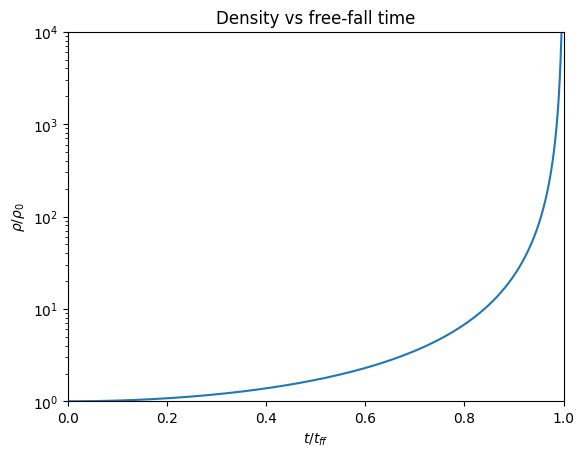

In [53]:
# Define new variables
r = np.linspace(1, 0, 1000)
rho = r**(-3)
time_t_ff = []

# From Eq. 22, Eq. 25, Eq. 26, and radius-density relation
for i in range(len(rho)):
    t_t_ff = (np.arccos(rho[i]**(-1/6)) + 0.5*np.sin(2*np.arccos(rho[i]**(-1/6)))) * 2 / np.pi
    time_t_ff.append(t_t_ff)

# Plot the density vs free-fall time
plt.plot(time_t_ff, rho)
plt.xlim(0,1)
plt.ylim(1,1e4)
plt.xlabel(r'$t/t_{ff}$')
plt.ylabel(r'$\rho/\rho_0$')
plt.title('Density vs free-fall time')
plt.yscale('log')
plt.yticks()
plt.show()